<a href="https://colab.research.google.com/github/KIMUTAI2020/YOB/blob/main/BRIANKIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT ON LOAN APPROVAL DATASET

In [ ]:
import pandas as pd

In [ ]:
import zipfile
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("krishnaraj30/finance-loan-approval-prediction-data")

print("Path to dataset files:", path)

100%|██████████| 12.5k/12.5k [00:00<00:00, 19.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/krishnaraj30/finance-loan-approval-prediction-data/versions/1


In [ ]:
from google.colab import files

In [ ]:
upload=files.upload()

Saving archive.zip to archive.zip


In [ ]:
upload.keys()

dict_keys(['archive.zip'])

In [ ]:
extracted_files= os.listdir()
print(extracted_files)

['.config', 'archive.zip', 'sample_data']


In [ ]:
csv_file_name= 'archive.zip'
zip_file='archive.zip'

In [ ]:
zip_file='archive.zip'

In [ ]:
with zipfile.ZipFile(zip_file,'r') as zip_ref: zip_ref.extractall()

In [ ]:
extracted_files= os.listdir()
print("Extracted files",extracted_files)

Extracted files ['.config', 'archive.zip', 'train.csv', 'test.csv', 'sample_data']


In [ ]:
train_data='train.csv'
test_data='test.csv'

In [ ]:
train=pd.read_csv(train_data)
test=pd.read_csv(test_data)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Preprocess the training data
# Fill missing values
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['Credit_History'] = train['Credit_History'].fillna(0)
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Gender'] = train['Gender'].fillna(train['Gender'].mode())
train['Married'] = train['Married'].fillna(train['Married'].mode())

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.773616
std,6109.041673,2926.248369,84.107233,64.372489,0.418832
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.shape

(614, 13)

In [ ]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
# Convert categorical columns to numerical
train['Gender']=train['Gender'].map({'Male':1})

In [ ]:
train['Married']=train['Married'].map({'No':0,'Yes':1})

In [ ]:
train['Education']=train['Education'].map({'Not Graduate':0,'Graduate':1})

In [ ]:
train['Self_Employed']=train['Self_Employed'].map({'No':0,'Yes':1})

In [ ]:
train['Property_Area']=train['Property_Area'].map({'Rural':0,'Urban':1})

In [ ]:
train['Loan_Status']=train['Loan_Status'].map({'N':0,'Y':1})

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,NaN,0,1,0,5849,0.0,128.0,360.0,1.0,1.0,1
1,LP001003,1.0,NaN,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,LP001005,1.0,NaN,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,LP001006,1.0,NaN,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,LP001008,1.0,NaN,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1


In [ ]:
X = train.drop(['Loan_ID', 'Loan_Status'], axis=1)

In [ ]:
y= train['Loan_Status']

In [ ]:
# Handle non-numeric values if present
X= X_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
X= X_train.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5402 - loss: 426.5121 - val_accuracy: 0.6970 - val_loss: 74.1530
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5972 - loss: 306.3324 - val_accuracy: 0.4545 - val_loss: 65.5022
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5577 - loss: 313.8393 - val_accuracy: 0.4545 - val_loss: 51.2167
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5830 - loss: 195.7265 - val_accuracy: 0.4444 - val_loss: 60.3819
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5539 - loss: 221.9918 - val_accuracy: 0.3939 - val_loss: 83.1153
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6163 - loss: 159.9512 - val_accuracy: 0.3030 - val_loss: 81.0829
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5583 - loss: 180.3460 - val_accuracy: 0.3333 - val_loss: 40.6640
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5592 - loss: 162.2725 - val_accu

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3731 - loss: 12.5587 
Test Loss: 13.352096557617188
Test Accuracy: 0.4146341383457184


In [ ]:
# Preprocess the test data
# Fill missing values
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['Credit_History'] = test['Credit_History'].fillna(0)

In [ ]:
# Convert categorical columns to numerical
test['Gender']=test['Gender'].map({'Male':1})

In [ ]:
test['Married']=test['Married'].map({'No':0,'Yes':1})

In [ ]:
test['Education']=test['Education'].map({'Not Graduate':0,'Graduate':1})

In [ ]:
test['Self_Employed']=test['Self_Employed'].map({'No':0,'Yes':1})

In [ ]:
test['Property_Area']=test['Property_Area'].map({'Rural':0,'Urban':1})

In [ ]:
# Prepare test features
X_test_final = test.drop(['Loan_ID'], axis=1)
X_test_final = X_test_final.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
X_test_final = X_test_final.fillna(0)  # Fill any remaining NaN values with 0

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_final = scaler.transform(X_test_final)

In [ ]:
# Make predictions
predictions = model.predict(X_test_final)
predictions = (predictions > 0.5).astype(int)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:

# Add predictions to the test data
test['Loan_Status_Prediction'] = predictions

In [ ]:
import pandas as pd

# Assuming predictions is a numpy array or list
predictions = model.predict(X_test_final)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted'])

# Save to CSV
predictions_df.to_csv('predictions.csv', index=False)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
# Display the first few values
print(predictions_df.head())

   Predicted
0   0.443236
1   0.441727
2   0.474812
3   0.470567
4   0.466956


In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts()

# Get the number of rejected loans
rejected_loans = prediction_counts.get(0, 0)  # Default to 0 if not found
print(f'Number of loans rejected: {rejected_loans}')


Number of loans rejected: 302


In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts()

# Get the number of Approved loans
approved_loans = prediction_counts.get(1, 1)  # Default to 0 if not found
print(f'Number of loans Approved: {approved_loans}')

Number of loans Approved: 65


In [ ]:
# Map the Education column to Graduate (1) and Non-Graduate (0)
test['Education_Status'] = test['Education'].map({0: 'Not Graduate', 1: 'Graduate'})

# Count the number of graduates with approved loan status
num_graduates_approved = ((test['Education_Status'] == 'Graduate') & (test['Loan_Status_Prediction'] == 1)).sum()

print(f'Number of graduates with approved loan status: {num_graduates_approved}')


Number of graduates with approved loan status: 49


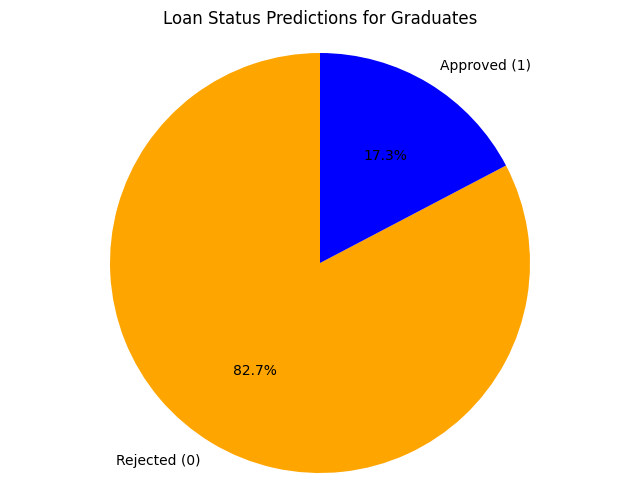

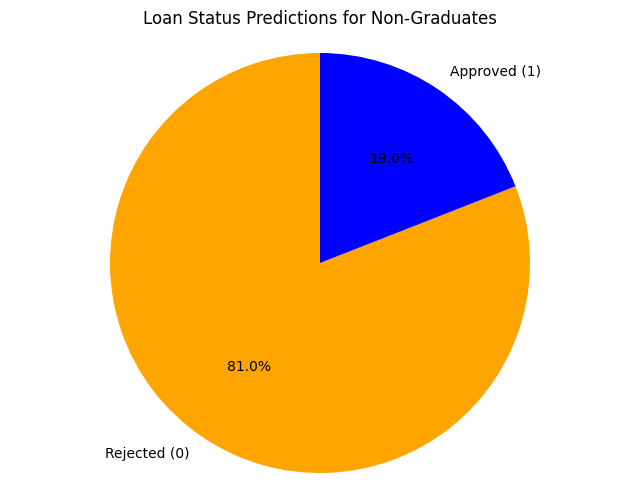

In [ ]:
import matplotlib.pyplot as plt
# Map the Education column to Graduate (1) and Non-Graduate (0)
test['Education_Status'] = test['Education'].map({0: 'Not Graduate', 1: 'Graduate'})

# Count loan status for each education status
loan_status_by_education = test.groupby(['Education_Status', 'Loan_Status_Prediction']).size().unstack(fill_value=0)

# Create a pie chart for graduates
plt.figure(figsize=(8, 6))
plt.pie(loan_status_by_education.loc['Graduate'],
        labels=['Rejected (0)', 'Approved (1)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'blue'])
plt.title('Loan Status Predictions for Graduates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Create a pie chart for non-graduates
plt.figure(figsize=(8, 6))
plt.pie(loan_status_by_education.loc['Not Graduate'],
        labels=['Rejected (0)', 'Approved (1)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'blue'])
plt.title('Loan Status Predictions for Non-Graduates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

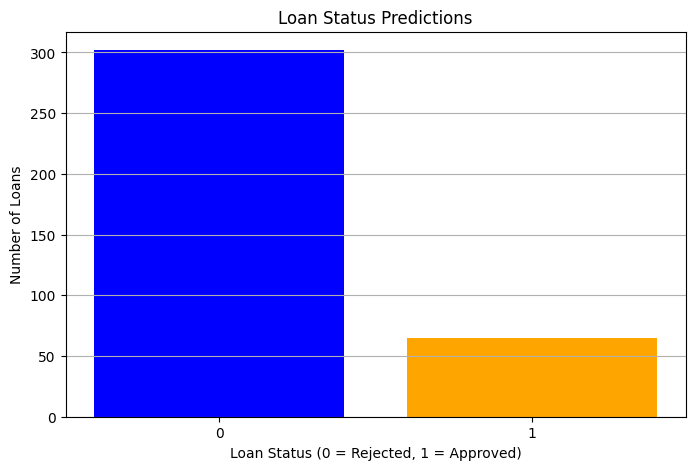

In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(prediction_counts.index.astype(str), prediction_counts.values, color=['blue', 'orange'])
plt.title('Loan Status Predictions')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


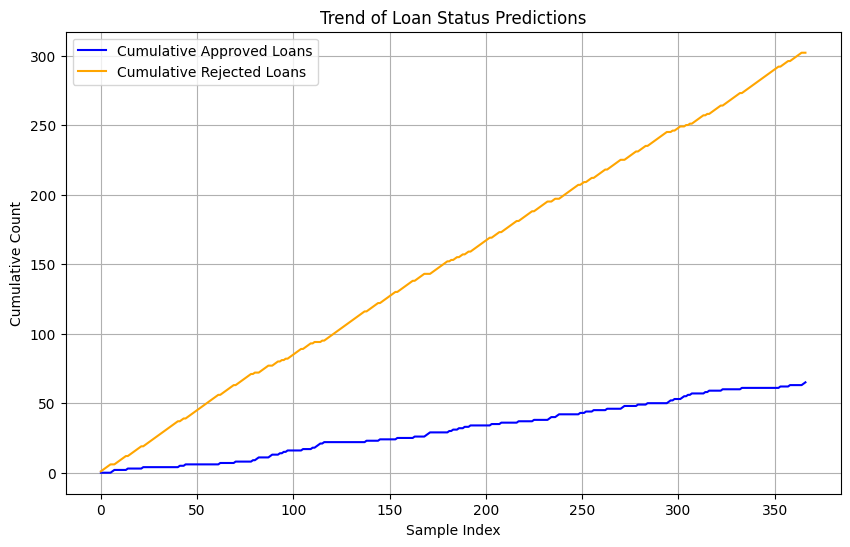

In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts().sort_index()

# Create cumulative sums for approved (1) and rejected (0)
cumulative_approved = (test['Loan_Status_Prediction'] == 1).cumsum()
cumulative_rejected = (test['Loan_Status_Prediction'] == 0).cumsum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_approved, label='Cumulative Approved Loans', color='blue')
plt.plot(cumulative_rejected, label='Cumulative Rejected Loans', color='orange')

# Add titles and labels
plt.title('Trend of Loan Status Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid()
plt.show()


We calculate cumulative counts of approved and rejected loans using boolean indexing and the cumsum() function.
The trend lines are plotted for both approved and rejected loans, allowing you to see how the predictions accumulate across the dataset.

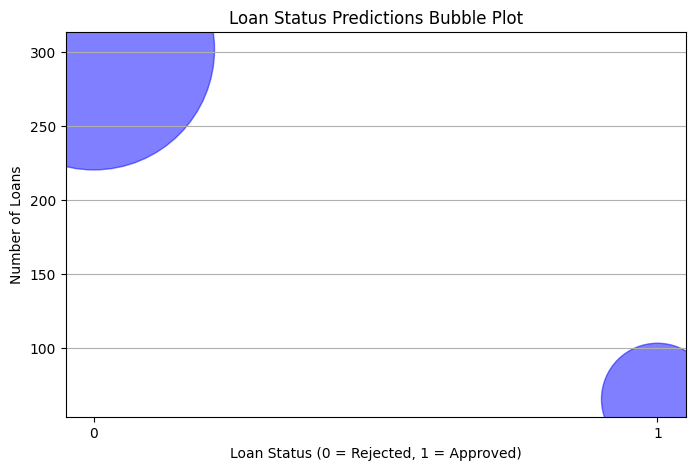

In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts()

# Prepare data for the bubble plot
statuses = prediction_counts.index.astype(str)
counts = prediction_counts.values

# Define sizes for the bubbles
sizes = counts * 100  # Scale the sizes for better visibility

# Create a bubble plot
plt.figure(figsize=(8, 5))
plt.scatter(statuses, counts, s=sizes, alpha=0.5, color='blue')

# Add titles and labels
plt.title('Loan Status Predictions Bubble Plot')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Number of Loans')
plt.grid(axis='y')

# Show the plot
plt.show()

Rejected has a bigger buuble than approved

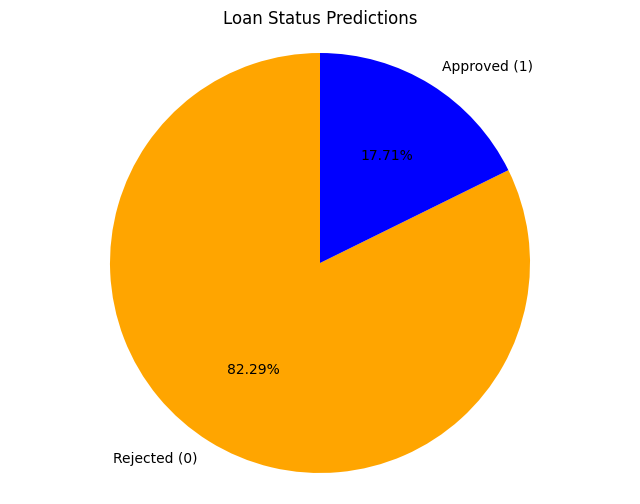

In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(prediction_counts, labels=['Rejected (0)', 'Approved (1)'], autopct='%1.2f%%', startangle=90, colors=['orange', 'blue'])
plt.title('Loan Status Predictions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


The number of rejected loans is higher than the number of approved loans